In [243]:
#Are there common characteristics per car for sale when compared to region? (drivetrain, MaxMPG, Fueltype, Price) 
#Which region has the most and which region has the least number of listings? 
#Is there a correlation between mileage and price? 
#What are the most common factors that affect car pricing?
#What is the impact of location on car pricing? 


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
car_sale_data = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

In [246]:
car_sale_data

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [262]:
# Load the database into a pandas dataframe
car_sale_data = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

# Remove the dollar sign from the 'Price' column
car_sale_data['Price'] = car_sale_data['Price'].str.replace('$', '')

# Remove the comma from the 'Price' column
car_sale_data['Price'] = car_sale_data['Price'].str.replace(',', '')

# Remove the "Not Priced" from the 'Price' column
car_sale_data = car_sale_data[car_sale_data['Price']!= 'Not Priced']

# Turn 'Price' into all ints
car_sale_data['Price'] = car_sale_data['Price'].astype(int)

car_sale_data['State'] = car_sale_data['State'].replace('AZ-101', 'AZ')
car_sale_data['State'] = car_sale_data['State'].replace('Michigan', 'Mi')

car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Electric Fuel System', 'Gasoline')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Gasoline Fuel', 'Gasoline')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Gasoline/Mild Electric Hybrid', 'Hybrid')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Plug-In Electric/Gas', 'Hybrid')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('E85 Flex Fuel', 'Gasoline')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Flex Fuel Capability', 'Gasoline')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Flexible Fuel', 'Gasoline')
car_sale_data['FuelType'] = car_sale_data['FuelType'].replace('Diesel Fuel', 'Diesel')


car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['State'] == 'Suite'].index)
car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['State'] == 'US-169'].index)
car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['State'] == 'SE'].index)
car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['State'] == 'Glens'].index)
car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['State'] == 'Bldg'].index)
car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['State'] == 'US-12'].index)
car_sale_data = car_sale_data.drop(car_sale_data[car_sale_data['FuelType'] == '–'].index)

car_sale_data

/var/folders/s0/6td_1_5n7m94_g09f8k7mnz00000gn/T/ipykernel_4804/1555663795.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_sale_data['Price'] = car_sale_data['Price'].str.replace('$', '')


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [263]:
State_data = car_sale_data.groupby('State').agg({'Drivetrain': lambda x: x.value_counts().index[0],
                                        'FuelType': lambda x: x.value_counts().index[0],
                                        'MaxMPG': 'max'})

State_data['AvgPrice'] = car_sale_data.groupby('State')['Price'].mean()

print(State_data)

              Drivetrain  FuelType  MaxMPG      AvgPrice
State                                                   
AK       All-wheel Drive  Gasoline      32  32300.000000
AL     Front-wheel Drive  Gasoline      40  41937.847222
AR      Four-wheel Drive  Gasoline      39  42052.853659
AZ     Front-wheel Drive  Gasoline     124  40404.058480
CA       All-wheel Drive  Gasoline     124  44284.823529
CO       All-wheel Drive  Gasoline     117  41623.962025
CT       All-wheel Drive  Gasoline      36  36990.545455
DE       All-wheel Drive  Gasoline     123  55520.692308
FL     Front-wheel Drive  Gasoline     123  39411.961582
GA     Front-wheel Drive  Gasoline     124  44589.938303
HI     Front-wheel Drive  Gasoline      37  35607.125000
IA      Four-wheel Drive  Gasoline      38  45895.060606
ID       All-wheel Drive  Gasoline      39  36338.035714
IL       All-wheel Drive  Gasoline     117  39564.355442
IN       All-wheel Drive  Gasoline     114  37392.593407
KS       All-wheel Drive  Gasol

In [264]:
car_sale_data.groupby('State').mean()

,Year,Price,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
State,,,,,,,,,,,,,,,
AK,2020.000000,32300.000000,4.800000,133.000000,4.700000,915.000000,4.900000,4.700000,4.700000,4.600000,4.800000,4.800000,25.000000,32.000000,40202.000000
AL,2019.861111,41937.847222,4.776389,92.375000,4.316667,379.888889,4.845833,4.802778,4.766667,4.640278,4.822222,4.775000,21.277778,28.694444,35122.430556
AR,2019.439024,42052.853659,4.734146,153.951220,4.324390,1086.707317,4.821951,4.765854,4.702439,4.582927,4.807317,4.670732,20.390244,27.000000,43359.634146
AZ,2018.678363,40404.058480,4.698830,134.461988,4.404971,1038.444444,4.747076,4.699123,4.690058,4.544444,4.770468,4.705263,27.029240,32.830409,38063.309942
CA,2018.739065,44284.823529,4.643891,84.458522,4.282956,736.140271,4.725189,4.683409,4.677225,4.441478,4.749925,4.592609,26.932127,32.971342,33939.995475
CO,2018.487342,41623.962025,4.663291,142.354430,4.460127,937.462025,4.743038,4.705696,4.678481,4.464557,4.748734,4.641772,24.253165,29.930380,39272.025316
CT,2018.404040,36990.545455,4.731313,153.828283,4.478788,849.909091,4.800000,4.745455,4.717172,4.555556,4.776768,4.735354,21.171717,27.969697,40770.818182
DE,2019.538462,55520.692308,4.661538,94.769231,4.676923,444.230769,4.715385,4.723077,4.700000,4.461538,4.700000,4.661538,36.769231,39.538462,34384.076923
FL,2019.050847,39411.961582,4.703955,111.790960,4.460339,1794.526554,4.764746,4.721356,4.691977,4.538983,4.785650,4.691299,22.471186,29.258757,33767.659887


In [265]:
car_sale_data['State'].value_counts()

TX    1221
FL     885
CA     663
IL     588
NY     439
GA     389
AZ     342
VA     338
NJ     337
OH     328
MD     321
MA     320
PA     282
MI     268
MN     228
NC     227
IN     182
MO     170
TN     166
WA     165
SC     163
CO     158
WI     127
CT      99
NV      93
KS      81
NH      80
KY      79
UT      73
AL      72
LA      51
OK      45
AR      41
OR      37
NE      37
RI      35
IA      33
ID      28
MS      23
SD      23
HI      16
ND      14
WV      13
DE      13
RT      13
ME       8
VT       7
NM       5
MT       4
WY       3
Mi       2
AK       1
Name: State, dtype: int64

In [278]:
State_counts = car_sale_data.groupby('State')['Drivetrain'].count()

most_listings_State = State_counts.idxmax()
most_listings_count = State_counts.max()

least_listings_State = State_counts.idxmin()
least_listings_count = State_counts.min()

print(f"The State with the most listings is {most_listings_State} with {most_listings_count} listings.")
print(f"The State with the least listings is {least_listings_State} with {least_listings_count} listings.")

The State with the most listings is TX with 1221 listings.
The State with the least listings is AK with 1 listings.


Correlation coefficient: -0.3477164083888487


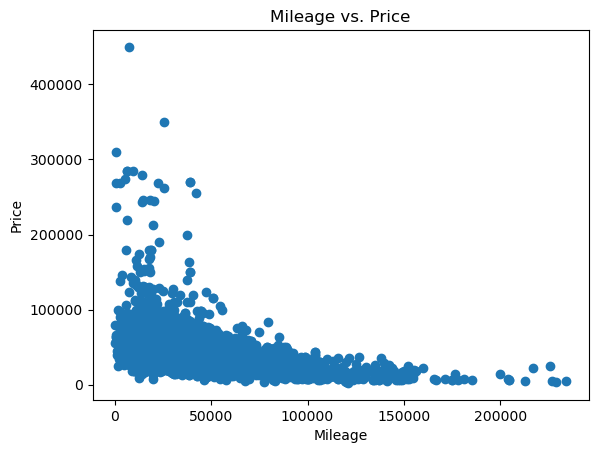

In [277]:
plt.figure()
plt.scatter(car_sale_data['Mileage'], car_sale_data['Price'])
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
print('Correlation coefficient:', car_sale_data['Mileage'].corr(car_sale_data['Price']))

In [271]:
correlations = car_sale_data.corr()['Price']

sorted_correlations = correlations.abs().sort_values(ascending=False)

print("Top 15 factors affecting car pricing:")
for i in range(1, 15):
    factor = sorted_correlations.index[i]
    correlation = correlations[factor]
    print(f"{i}. {factor}: {correlation:.2f}")

Top 15 factors affecting car pricing:
1. Mileage: -0.35
2. Year: 0.33
3. ConsumerReviews: -0.31
4. ValueForMoneyRating: -0.25
5. ReliabilityRating: -0.18
6. ConsumerRating: -0.09
7. InteriorDesignRating: 0.08
8. ComfortRating: -0.07
9. PerformanceRating: 0.05
10. MinMPG: 0.04
11. SellerRating: 0.04
12. MaxMPG: -0.02
13. SellerReviews: -0.02
14. ExteriorStylingRating: 0.02


In [272]:
Year_price = car_sale_data.groupby('Year')['Price'].mean()
DealType_price = car_sale_data.groupby('DealType')['Price'].mean()
Make_price = car_sale_data.groupby('Make')['Price'].mean()
UsedNew_price = car_sale_data.groupby('Used/New')['Price'].mean()
State_price = car_sale_data.groupby('State')['Price'].mean()
FuelType_price = car_sale_data.groupby('FuelType')['Price'].mean()
Mileage_price = car_sale_data.groupby('Mileage')['Price'].mean()

#graph all
print("Average price by year:")
print(Year_price)
print("\nAverage price by DealType:")
print(DealType_price)
print("\nAverage price by Make:")
print(Make_price)
print("\nAverage price by Used/New:")
print(UsedNew_price)
print("\nAverage price by State:")
print(State_price)
print("\nAverage price by FuelType:")
print(FuelType_price)
print("\nAverage price by Mileage:")
print(Mileage_price)

Average price by year:
Year
2001     5995.000000
2002    22900.000000
2003    10337.857143
2004     8415.444444
2005     9735.363636
2006     9512.125000
2007    11551.153846
2008    18329.266667
2009    13462.555556
2010    15160.562500
2011    14305.340909
2012    18310.338235
2013    23328.990566
2014    24956.093525
2015    30688.536481
2016    31294.542169
2017    33144.611888
2018    36146.293346
2019    39830.872811
2020    43092.300200
2021    50067.009098
2022    53927.989247
Name: Price, dtype: float64

Average price by DealType:
DealType
Fair     43666.789689
Good     39047.098292
Great    36664.205944
Name: Price, dtype: float64

Average price by Make:
Make
Acura             35599.369565
Alfa              34577.500000
Audi              46193.441038
BMW               44383.168611
Bentley          146911.833333
Buick             27255.438596
Cadillac          41564.702341
Chevrolet         36619.715663
Chrysler          26398.815789
Dodge             38621.489362
FIAT        

In [273]:
State_factors = car_sale_data.groupby('State').agg({'Price': 'mean'}).sort_values(by='Price', ascending=False)
print(State_factors)

              Price
State              
DE     55520.692308
WY     48696.333333
IA     45895.060606
GA     44589.938303
ND     44486.071429
WV     44478.692308
NJ     44286.706231
CA     44284.823529
NM     43904.800000
MO     42583.923529
VA     42480.860947
AR     42052.853659
AL     41937.847222
CO     41623.962025
NY     41122.175399
MT     41115.250000
TX     41012.723997
RT     40913.000000
WA     40576.539394
MD     40434.928349
AZ     40404.058480
UT     40349.849315
NC     40030.392070
IL     39564.355442
OR     39460.432432
FL     39411.961582
NH     38275.087500
NV     37713.096774
IN     37392.593407
RI     37178.971429
TN     37128.313253
CT     36990.545455
LA     36938.568627
KS     36445.222222
ID     36338.035714
KY     36189.962025
NE     36121.675676
MS     36092.826087
SC     35921.024540
MA     35907.878125
MN     35825.956140
PA     35765.858156
HI     35607.125000
MI     34891.861940
WI     34008.440945
OH     33345.112805
OK     33206.111111
ME     32881.250000


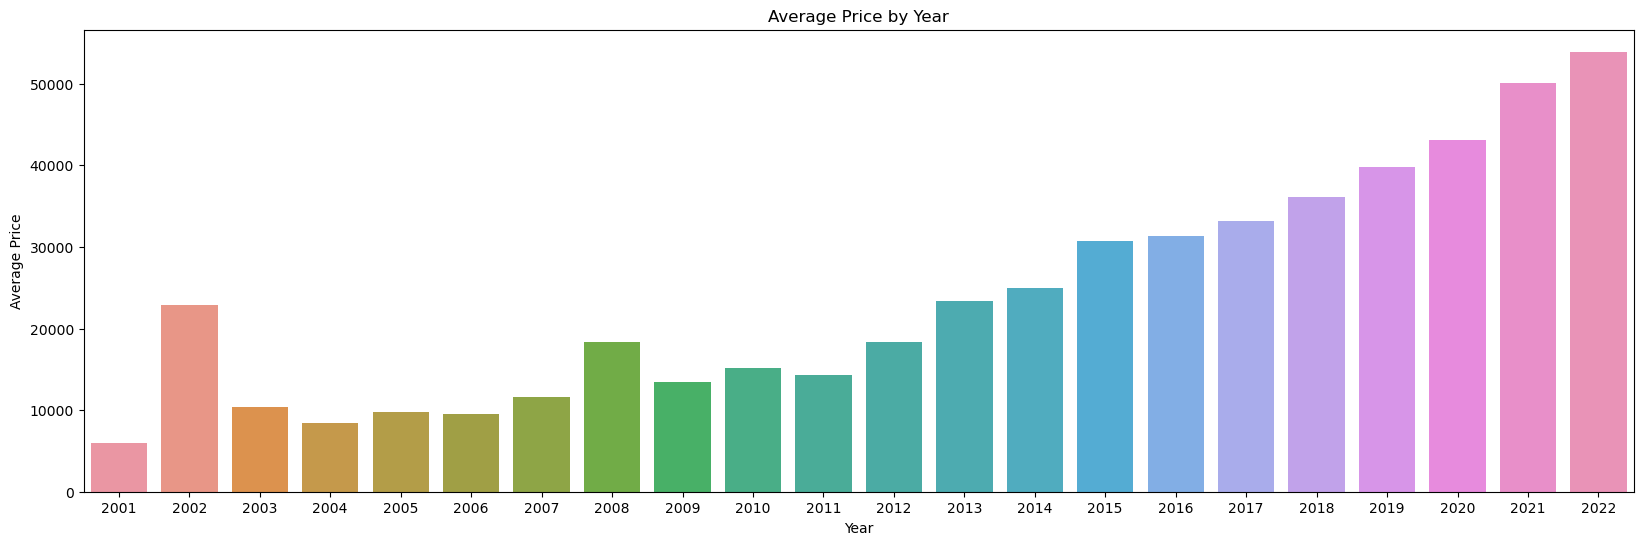

In [283]:
plt.figure(figsize=(20, 6))


Year_price = car_sale_data.groupby('Year')['Price'].mean()


sns.barplot(x=Year_price.index, y=Year_price.values)


plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')


plt.show()


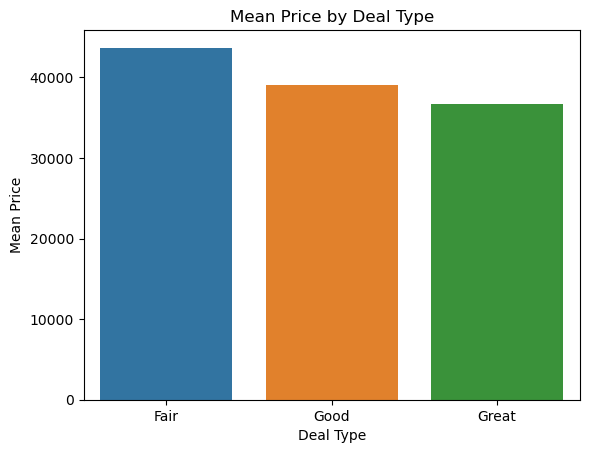

In [281]:
DealType_price = car_sale_data.groupby('DealType')['Price'].mean()


sns.barplot(x=DealType_price.index, y=DealType_price.values)


plt.title('Mean Price by Deal Type')
plt.xlabel('Deal Type')
plt.ylabel('Mean Price')


plt.show()

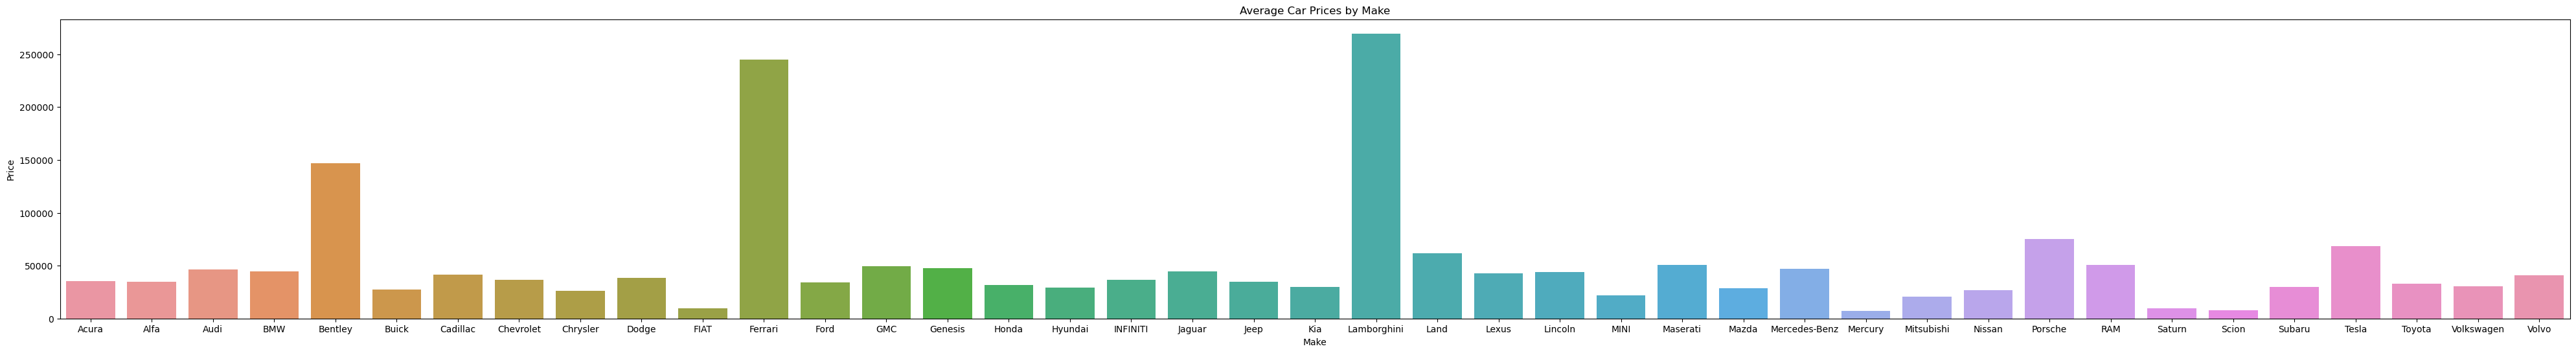

In [293]:
Make_price = car_sale_data.groupby('Make')['Price'].mean()

plt.figure(figsize=(50, 6))
sns.barplot(x=Make_price.index, y=Make_price.values)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Average Car Prices by Make')
plt.show()

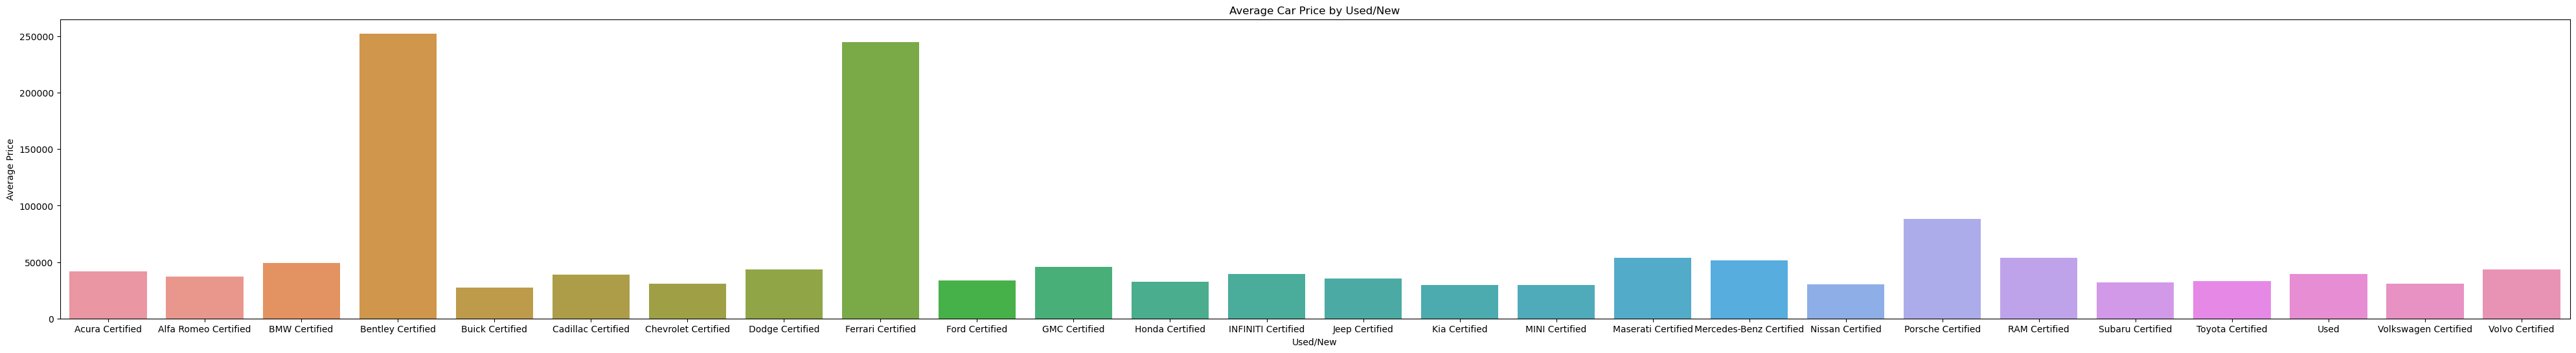

In [295]:
UsedNew_price = car_sale_data.groupby('Used/New')['Price'].mean()

plt.figure(figsize=(50, 6))

sns.barplot(x=UsedNew_price.index, y=UsedNew_price.values)


plt.title('Average Car Price by Used/New')
plt.xlabel('Used/New')
plt.ylabel('Average Price')


plt.show()

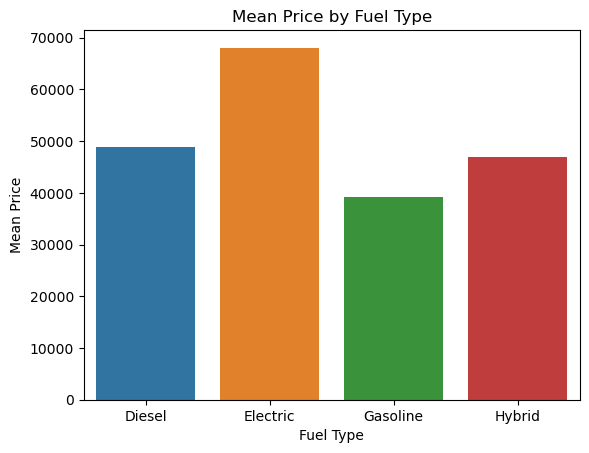

In [300]:
FuelType_price = car_sale_data.groupby('FuelType')['Price'].mean()


sns.barplot(x=FuelType_price.index, y=FuelType_price.values)


plt.title('Mean Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price')


plt.show()

In [274]:
price_factors = car_sale_data.drop(columns=['Model']).corrwith(car_sale_data['Price']).sort_values(ascending=False)
print(f"Most important factors that affects car pricing:\n{price_factors.head(10)}")

Most important factors affecting car pricing:
Price                    1.000000
Year                     0.329497
InteriorDesignRating     0.081924
PerformanceRating        0.048518
MinMPG                   0.042642
SellerRating             0.038192
ExteriorStylingRating    0.015959
SellerReviews           -0.019242
MaxMPG                  -0.020587
ComfortRating           -0.071074
dtype: float64


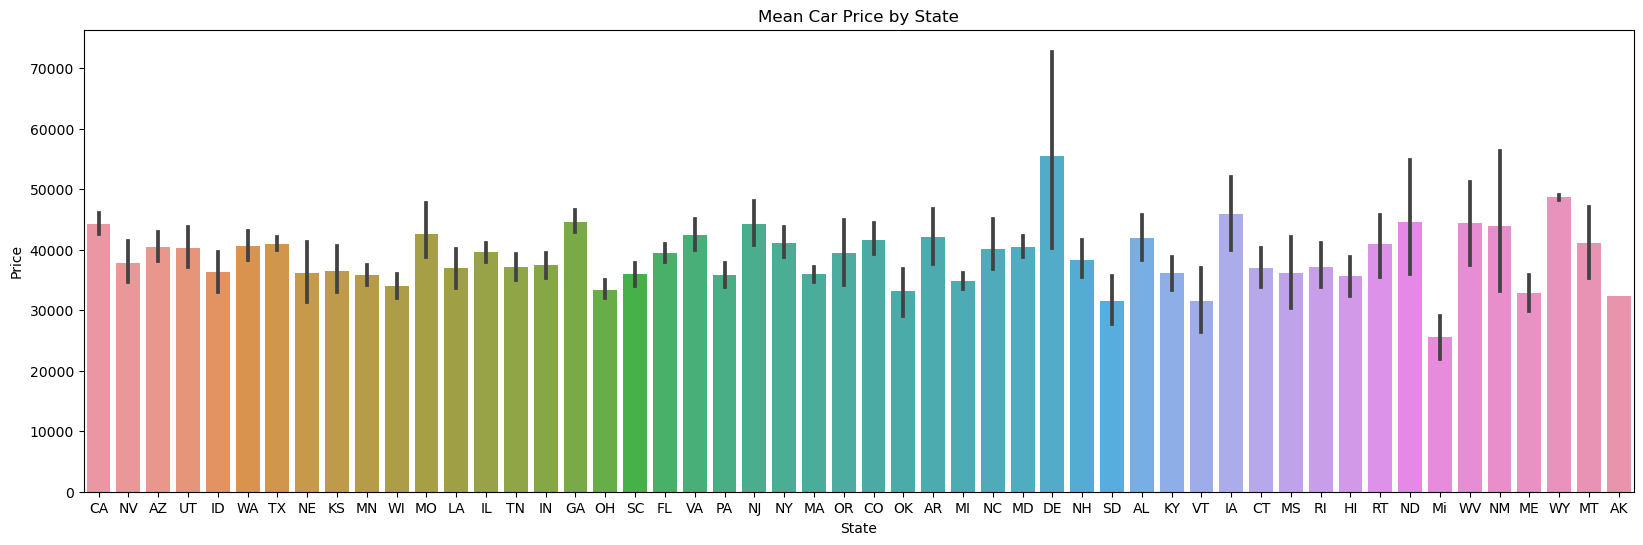

In [311]:
plt.figure(figsize=(20, 6))


sns.barplot(x='State', y='Price', data=car_sale_data)
plt.title('Mean Car Price by State')
plt.show()